# **지도학습 예제(선형회귀 - 캘리포니아 집값 예측)**

## **캘리포니아 집값데이터 다운로드**

In [3]:
import os
import tarfile
from urllib import request as req

# /content/input/housing/
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("input", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
  if not os.path.isdir(housing_path):
    os.makedirs(housing_path)

  tgz_path = os.path.join(housing_path, "housing.tgz")
  req.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()

fetch_housing_data()

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv("califonia_housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
df.iloc[10640:10645, ]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10640,-117.79,33.69,16.0,3067.0,396.0,1275.0,372.0,8.7385,340000.0,<1H OCEAN
10641,-117.80,33.69,13.0,1161.0,289.0,630.0,296.0,3.3438,333300.0,<1H OCEAN
10642,-117.80,33.55,38.0,1757.0,464.0,821.0,426.0,4.1304,433300.0,<1H OCEAN
10643,-117.79,33.56,36.0,2057.0,329.0,658.0,309.0,7.8660,500001.0,<1H OCEAN
10644,-117.81,33.56,24.0,6258.0,1003.0,1730.0,752.0,10.9601,500001.0,<1H OCEAN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## **단순회귀**

In [15]:
x_data = df[["median_income"]]
y_data = df["median_house_value"]
print(type(x_data))
print(x_data.shape, y_data.shape)

<class 'pandas.core.frame.DataFrame'>
(20640, 1) (20640,)


In [24]:
# 학습용 데이터 테스트 데이터 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =\
      train_test_split(x_data, y_data, test_size=0.25, random_state=0)
X_train.shape

(15480, 1)

In [28]:
# 1. scikit-learn의 적절한 모델(Estimator) 클래스 선택한다.
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
print(model)

LinearRegression()


In [29]:
# 2. 모델 클래스를 인스턴스화하고 모델의 초모수(hyperparameters)를
# 설정한다. 아래는 기본 값으로 설정한 예 이다.
print(X_train.shape, y_train.shape)

(15480, 1) (15480,)


In [30]:
# 3. 데이터를 특징 배열(데이터)과 대상 벡터(정답)로 구성해 배치한다.
# X_train과 y_train은 각각 2차원 배열과 1차원 배열로 구성되어 있음
model.fit(X_train, y_train)

LinearRegression()

In [32]:
# 4. 모델 클래스의 fit() 메서드를 이용해 데이터를 모델에 적용해
# 학습을 시킨다.
print(model.coef_, " == ", model.intercept_)

[42273.4569244]  ==  43642.77420917124


In [33]:
# 5. 학습이 완료된 모델을 새로운 데이터에 적용한다.
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)

rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

85167.68498179798


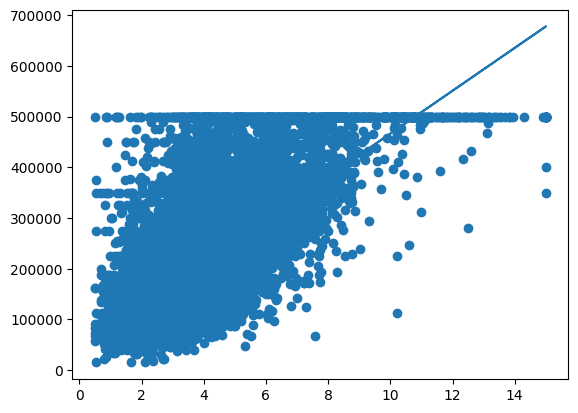

In [35]:
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred)
plt.show()